In [12]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [13]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/HPG Historical Data.csv', sep=";")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [14]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [15]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [16]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[19.31848759 19.31092953 19.30337147 19.29581341 19.28825536 19.2806973
 19.27313924 19.26558118 19.25802313 19.25046507 19.24290701 19.23534895
 19.2277909  19.22023284 19.21267478 19.20511672 19.19755867 19.19000061
 19.18244255 19.17488449 19.16732644 19.15976838 19.15221032 19.14465226
 19.13709421 19.12953615 19.12197809 19.11442003 19.10686198 19.09930392]


In [17]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 9.619224881693569
Testing MAPE: 90.192855245673
Testing MAE: 9.56883072450836


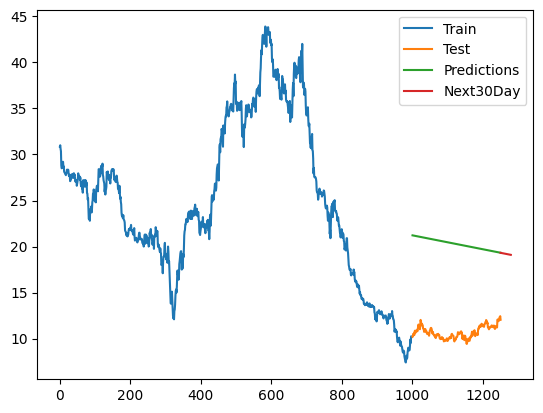

In [18]:
# 8.Vẽ hình
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [19]:
# 9. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(x_next_60_days)

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[19.31848759 19.31092953 19.30337147 19.29581341 19.28825536 19.2806973
 19.27313924 19.26558118 19.25802313 19.25046507 19.24290701 19.23534895
 19.2277909  19.22023284 19.21267478 19.20511672 19.19755867 19.19000061
 19.18244255 19.17488449 19.16732644 19.15976838 19.15221032 19.14465226
 19.13709421 19.12953615 19.12197809 19.11442003 19.10686198 19.09930392
 19.09174586 19.0841878  19.07662975 19.06907169 19.06151363 19.05395557
 19.04639752 19.03883946 19.0312814  19.02372334 19.01616529 19.00860723
 19.00104917 18.99349111 18.98593306 18.978375   18.97081694 18.96325888
 18.95570082 18.94814277 18.94058471 18.93302665 18.92546859 18.91791054
 18.91035248 18.90279442 18.89523636 18.88767831 18.88012025 18.87256219]


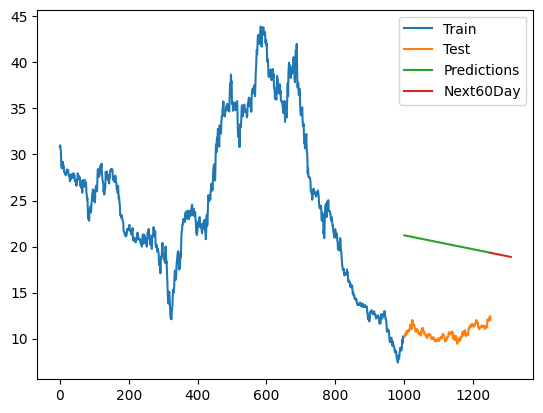

In [20]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

In [21]:
# 10. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[19.31848759 19.31092953 19.30337147 19.29581341 19.28825536 19.2806973
 19.27313924 19.26558118 19.25802313 19.25046507 19.24290701 19.23534895
 19.2277909  19.22023284 19.21267478 19.20511672 19.19755867 19.19000061
 19.18244255 19.17488449 19.16732644 19.15976838 19.15221032 19.14465226
 19.13709421 19.12953615 19.12197809 19.11442003 19.10686198 19.09930392
 19.09174586 19.0841878  19.07662975 19.06907169 19.06151363 19.05395557
 19.04639752 19.03883946 19.0312814  19.02372334 19.01616529 19.00860723
 19.00104917 18.99349111 18.98593306 18.978375   18.97081694 18.96325888
 18.95570082 18.94814277 18.94058471 18.93302665 18.92546859 18.91791054
 18.91035248 18.90279442 18.89523636 18.88767831 18.88012025 18.87256219
 18.86500413 18.85744608 18.84988802 18.84232996 18.8347719  18.82721385
 18.81965579 18.81209773 18.80453967 18.79698162 18.78942356 18.7818655
 18.77430744 18.76674939 18.75919133 18.75163327 18.74407521 18.73651716
 18.72

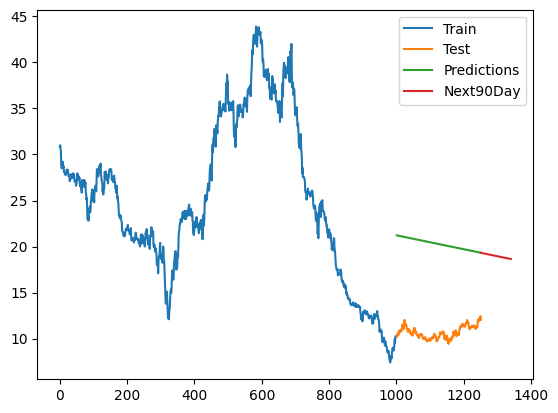

In [22]:
plt.plot(train_data.index, train_data)
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()